

*   Student Name: Prathish Kumar Peddakotla
*   Registration Number: 23026596



In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
df = pd.read_csv("/content/adult.csv.zip")
# top 5 rows of the dataset
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
cleaned = df.replace('?', np.nan)

cleaned = cleaned.dropna()
print(cleaned.shape)
cleaned.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# Specifying column names
colnames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
            'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# Assigning column names to the DataFrame
df.columns = colnames

# Displaying the first few rows of the DataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# change data type from object to string
continuous_col = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
category_col = ['workclass','education','marital-status','occupation','relationship','race',
              'sex','native-country','income']
# Change data type from object to string and strip white space
df[category_col] = df[category_col].astype(str).apply(lambda x: x.str.strip())

# Displaying information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


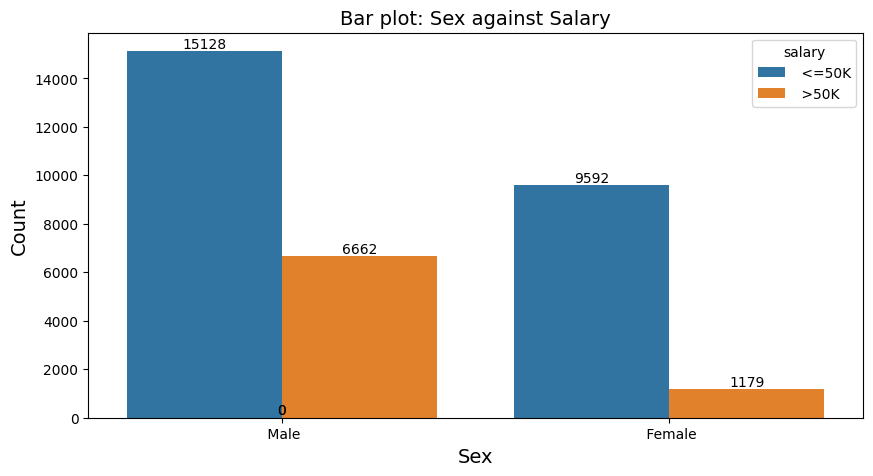

In [6]:
def bar_plot(dataframe, x_variable):
    """
    Plot the bar graph using sex with salary.

    Parameters:
    - dataframe: N-dimensional data.
    - x_variable: Categorical feature.

    """
    # Create a figure and axis object
    plt.figure(figsize=(10, 5))

    # Create the count plot with hue
    ax = sns.countplot(x=x_variable, hue='salary', data=dataframe, order=dataframe[x_variable].value_counts().index)

    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

    # Set labels and title
    plt.xlabel(x_variable.capitalize(), fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    plt.title(f'Bar plot: {x_variable.capitalize()} against Salary', fontsize = 14)

    # Show the plot
    plt.show()

# function call
bar_plot(cleaned, 'sex')


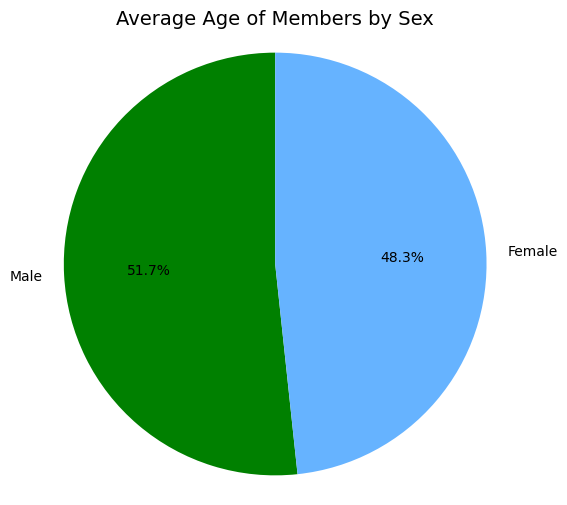

In [27]:
def avg_age_based_on_sex(df):
    """
    Plot the the average age of male and female  in a dataset.

    Arguments:
        data (DataFrame): sex column from the dataframe.
    """
    # Declaring locla variables.
    total_age_male = 0
    total_age_female = 0
    count_male = 0
    count_female = 0
    # Iterating over the sex column in csv file.
    for index, row in df.iterrows():
        if row['sex'] == 'Male':
            total_age_male += row['age']
            count_male += 1
        else:
            total_age_female += row['age']
            count_female += 1
    # finding the average for the male and female.
    avg_age_male = total_age_male / count_male if count_male > 0 else 0
    avg_age_female = total_age_female / count_female if count_female > 0 else 0

    # adding labels, size and colors to the pie chart.
    labels = ['Male', 'Female']
    sizes = [avg_age_male, avg_age_female]
    colors = ['green','#66b3ff']

    # Plotting the pie chart
    plt.figure(figsize=(6, 6))
    # plotting pie chart with colors and starting angle
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Average Age of Members by Sex', fontsize = 14)
    # Shares equal ratio in pie graph
    plt.axis('equal')

    # Show the plot
    plt.show()
# Calling function
avg_age_based_on_sex(df)


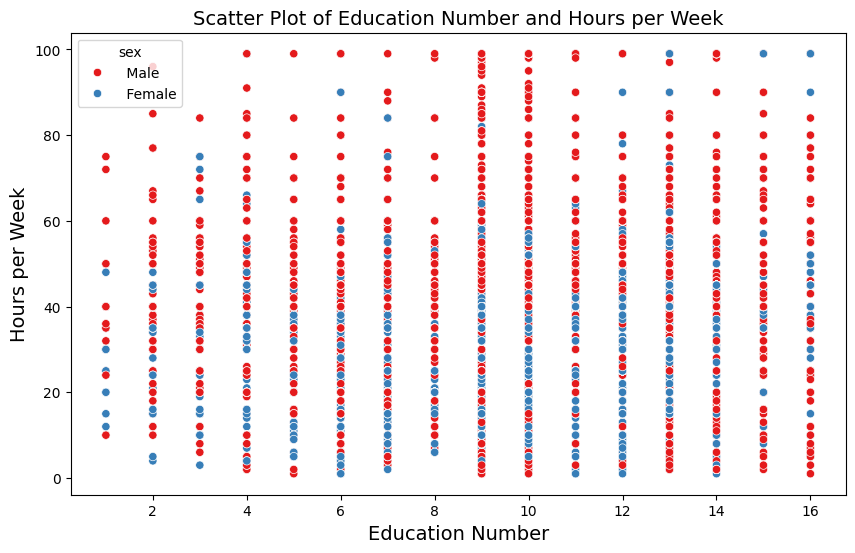

In [8]:
def scatterplot_1(dataframe):
    """
    Create a scatter plot for education-num against hours-per-week.

    Parameters:
    - dataframe: DataFrame containing the data
    """

    # creating the figure size.
    plt.figure(figsize=(10, 6))

    # Create the scatter plot
    sns.scatterplot(x='education-num', y='hours-per-week', data=dataframe, hue='sex', palette='Set1')

    # Set the both labels and title
    plt.xlabel('Education Number', fontsize = 14)
    plt.ylabel('Hours per Week', fontsize = 14)
    plt.title('Scatter Plot of Education Number and Hours per Week', fontsize = 14)

    # Show the plot
    plt.show()

# function calling
scatterplot_1(cleaned)


In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# Convert columns to numeric data type
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print(correlation_matrix)



                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


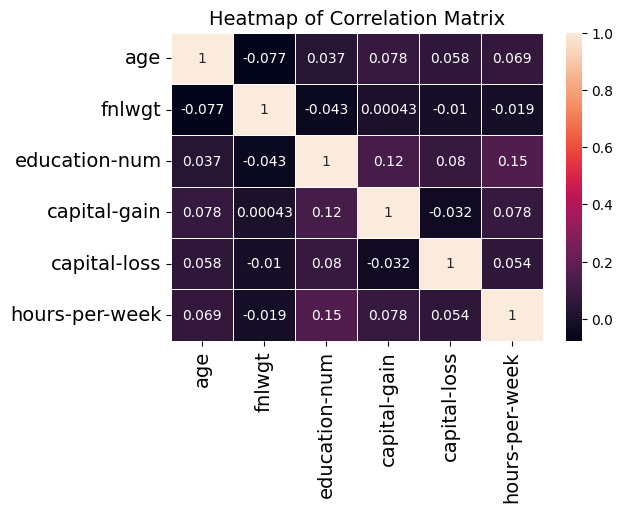

In [11]:
def plotting_heatmap(correlation_matrix):
    """
    Plotting a heatmap of the confusion matrix.

    Parameters:
        finding_correlation: correlation matrix.
    """

    # Check if the correlation matrix is empty or has a size of zero
    if correlation_matrix.empty or correlation_matrix.size == 0:
        print("Correlation matrix is empty or has a size of zero.")
        return

    # Size of the figure
    plt.figure(figsize=(6, 4))
    # Generating the heatmap from the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2g', linecolor='white')
    # Creating a title for the plot
    plt.title('Heatmap of Correlation Matrix', fontsize=14)
    # Adding the x and y ticks for the plot
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Call the function
plotting_heatmap(correlation_matrix)


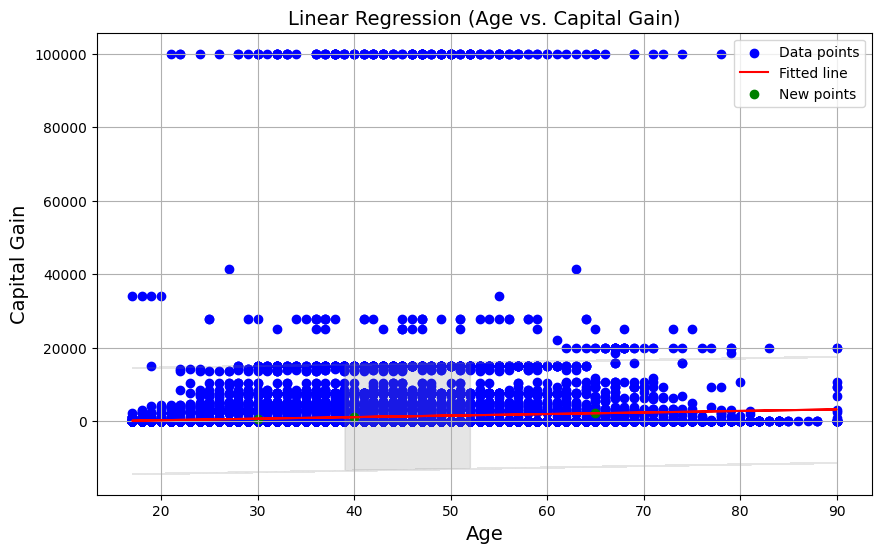

Slope: 42.05503412343373
Intercept: -544.9036271245504
Confidence Interval (95%): 14431.489391815096


In [12]:
def line_fitting(x, y, new_points=None):
    """
    Perform linear fitting, visualize the fitted line with confidence interval, and predict new data points.

    Parameters:
        x : Independent variable (x-axis).
        y : Dependent variable (y-axis).
        new_points : New points to be predicted (optional).

    Returns:
        tuple: Tuple containing slope, intercept, and confidence interval of the fitted line.
    """
    # Simple imputation: Fill missing values with mean
    x_mean = np.nanmean(x)
    y_mean = np.nanmean(y)
    x_filled = np.where(np.isnan(x), x_mean, x)
    y_filled = np.where(np.isnan(y), y_mean, y)

    # Reshape the data if needed
    x_filled = np.array(x_filled).reshape(-1, 1)
    y_filled = np.array(y_filled)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x_filled, y_filled)

    # Extract the slope and intercept from the model
    m = model.coef_[0]
    b = model.intercept_

    # Generate predicted y-values based on the fitted line
    y_pred = model.predict(x_filled)

    # Calculate residuals
    residuals = y_filled - y_pred

    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)

    # Calculate t-value for a 95% confidence interval
    t_value = stats.t.ppf(0.975, df=len(x_filled) - 2)

    # Calculate confidence interval for each point
    confidence_interval = t_value * std_residuals

    # Plot the figure
    plt.figure(figsize=(10, 6))

    # Plot data points
    plt.scatter(x_filled, y_filled, color='blue', label='Data points')

    # Plot fitted line
    plt.plot(x_filled, y_pred, color='red', label='Fitted line')

    # Plot confidence interval
    plt.fill_between(x_filled.flatten(), y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.2)

    # Plot new points if provided
    if new_points:
        new_points_pred = model.predict(np.array(new_points).reshape(-1, 1))
        plt.scatter(new_points, new_points_pred, color='green', label='New points')

    # Add labels and title
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Capital Gain', fontsize=14)
    plt.title('Linear Regression (Age vs. Capital Gain)', fontsize=14)

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

    return m, b, confidence_interval

# Independent variable (x-axis)
x = df['age'].values
# Dependent variable (y-axis)
y = df['capital-gain'].values

# New points to predict
new_points = [30, 40, 65]

# Fitting the best fit line, plotting with confidence interval, and predicting new data points
slope, intercept, confidence_interval = line_fitting(x, y, new_points)

# Printing the slope, intercept, and confidence interval
print("Slope:", slope)
print("Intercept:", intercept)
print("Confidence Interval (95%):", confidence_interval)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

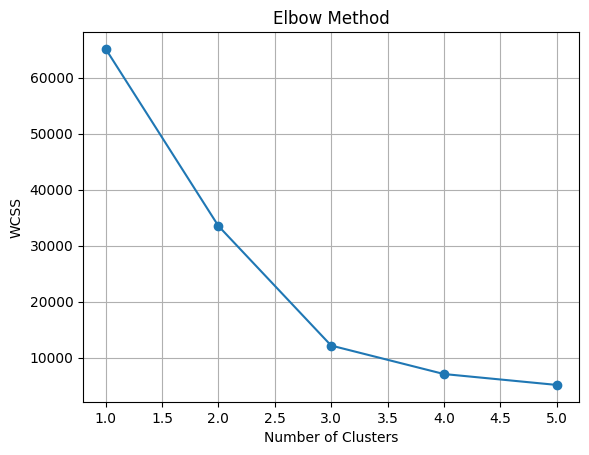

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


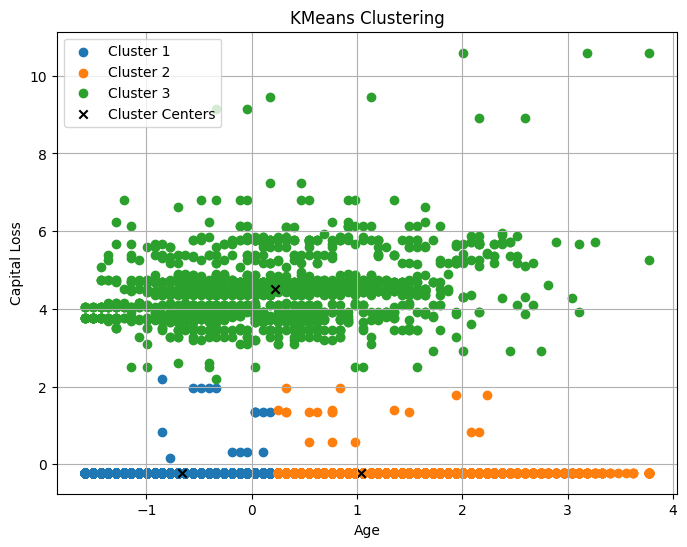

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


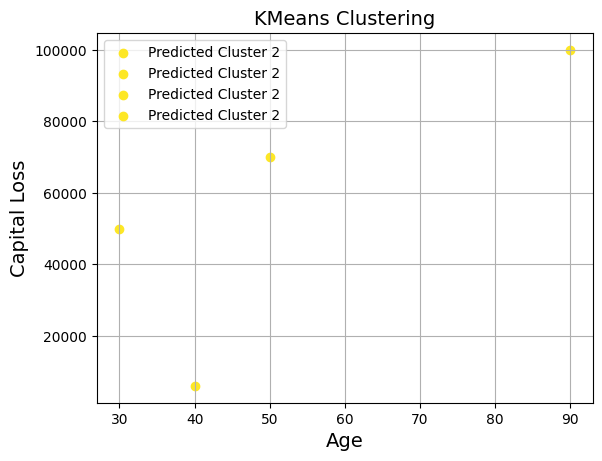

Predicted labels for new data points: [2 2 2 2]


In [19]:
# Global variable for scaler
scaler = StandardScaler()

def Standardization_data(df):
    """
    Rescaling the 'age' and 'capital-loss' columns in the same ratio.

    Parameters:
        data: DataFrame containing 'age' and 'capital-loss' columns.

    Return:
        ndarray: Rescaled data values.
    """
    return scaler.fit_transform(df[['age', 'capital-loss']])

def performing_elbow_method(data_scaled):
    """
    Calculate the optimal number of clusters using the elbow method.

    Parameters:
        data_scaled: Rescaled data.

    Returns:
        integer: Optimal number of clusters.
    """
    # within cluster sum of squares
    wcss = []
    # Adjusted range to avoid ValueError
    for i in range(1, 6):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    # Plotting the within-cluster sum of squares
    plt.plot(range(1, 6), wcss, marker='o')
    # Adding labels and title to the plot
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    # Adding grid
    plt.grid(True)
    plt.show()
    return 3

def visualize_clusters(data_scaled, optimal_num_clusters):
    """
    Visualizing the clusters based on the number of clusters.

    Parameters:
        data_scaled: Rescaled data.
        optimal_num_clusters: Optimal number of clusters.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    cluster_centers = kmeans.cluster_centers_
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Cluster Centers')
    # Adding labels and title to the plot
    plt.xlabel('Age')
    plt.ylabel('Capital Loss')
    plt.title('KMeans Clustering')
    plt.legend()
    # Adding grid
    plt.grid(True)
    plt.show()

def predicting_new_data_points(X, kmeans):
    """
    Predicts cluster labels for new data points.

    Parameters:
        X (ndarray): New data points.
        kmeans (KMeans): Trained KMeans model.

    Returns:
        ndarray: Predicted cluster labels for new data points.
    """
    scaled_X = scaler.transform(X)
    return kmeans.predict(scaled_X)

# Preprocessing the data
data_scaled = Standardization_data(df)

# Performing the elbow method to determine the optimal number of clusters
optimal_num_clusters = performing_elbow_method(data_scaled)

# Performing KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
visualize_clusters(data_scaled, optimal_num_clusters)

# Sample data for prediction
X_new = np.array([[30, 50000], [40, 6000], [50, 70000], [90, 100000]])

# Predict cluster labels for new data points
predicted_labels = predicting_new_data_points(X_new, kmeans)

# Generate colors randomly based on the number of clusters
colors = plt.cm.viridis(np.linspace(0, 1, optimal_num_clusters))

# Plot the new data points with colors corresponding to their predicted clusters
for i, label in enumerate(predicted_labels):
    plt.scatter(X_new[i, 0], X_new[i, 1], color=colors[label], label=f'Predicted Cluster {label}')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Capital Loss', fontsize=14)
plt.title('KMeans Clustering', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print predicted labels for new data points
print("Predicted labels for new data points:", predicted_labels)


In [32]:
# finding the statistics using describe functon.
description = df.describe()
# printing describe function.
print(description)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [20]:
mean_df = df.select_dtypes(include=['int64', 'float64'])
# Calculating the mean for each numeric column
means = mean_df.mean()

print("Mean values for each numeric column:", means,sep='\n')

Mean values for each numeric column:
age                   38.581647
fnlwgt            189778.366512
education-num         10.080679
capital-gain        1077.648844
capital-loss          87.303830
hours-per-week        40.437456
dtype: float64


In [28]:
median_df = df.select_dtypes(include=['int64', 'float64'])
# Calculating the meadian for each numeric column
medians = median_df.median()

print("Median values for each numeric column:", medians,sep='\n')

Median values for each numeric column:
age                   37.0
fnlwgt            178356.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64


In [29]:
standard_deviation_df = df.select_dtypes(include=['int64', 'float64'])
# Calculating the standard deviation for each numeric column
standard_deviation = standard_deviation_df.std()

print("Standarad deviation values for each numeric column:", standard_deviation,sep='\n')

Standarad deviation values for each numeric column:
age                   13.640433
fnlwgt            105549.977697
education-num          2.572720
capital-gain        7385.292085
capital-loss         402.960219
hours-per-week        12.347429
dtype: float64


In [30]:
skew_df = df.select_dtypes(include=['int64', 'float64'])
# Calculating the skew for each numeric column
skewness = standard_deviation_df.skew()

print("skewness values for each numeric column:", skewness,sep='\n')

skewness values for each numeric column:
age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64


In [31]:
df_kurtosis_df = df.select_dtypes(include=['int64', 'float64'])
# Calculating the standard deviation for each numeric column
df_kurtosis = standard_deviation_df.kurtosis()

print("kurtosis values for each numeric column:", df_kurtosis,sep='\n')

kurtosis values for each numeric column:
age                -0.166127
fnlwgt              6.218811
education-num       0.623444
capital-gain      154.799438
capital-loss       20.376802
hours-per-week      2.916687
dtype: float64
